In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [10]:
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx', header=0)
print(df.head())

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

In [11]:
#데이터 전처리 작업
df = df.fillna(method='ffill')  #'전출지별'이 누락된 데이터를 앞 데이터로 채움
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


<AxesSubplot:>

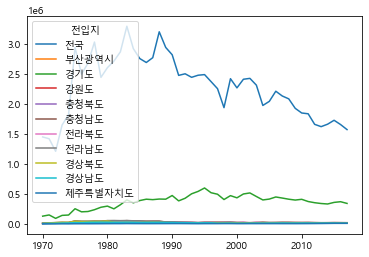

In [12]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask =(df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시' )
df_seoul = df[mask]   # mask를 이용하여 True인 데이터만 추출
df_seoul = df_seoul.drop(['전출지별'], axis=1) # 전출지별 컬럼 삭제
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 컬럼명 변경
df_seoul.set_index('전입지', inplace=True)  # '전입지' 컬럼을 인덱스로 설정
#df_seoul
df_seoul.T.plot()

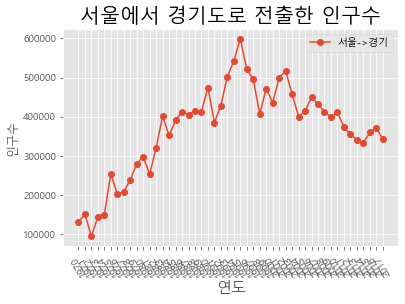

In [21]:
df_1 = df_seoul.loc['경기도']  # x축과 y출으로 구성됨

plt.style.use('ggplot')
plt.plot(df_1.index, df_1.values, marker='o')  #plt.plot(x축, y축)

plt.title("서울에서 경기도로 전출한 인구수", size=20)
plt.xlabel("연도",size=15)  #축 라벨
plt.ylabel("인구수")  #y축 라벨
plt.xticks(rotation=120) # x라벨의 기울기
plt.legend(labels=["서울->경기"], loc='upper right')

plt.show()

In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
#부산에서 다른지역으로 전출한 데이터만 추출해서 df_busan으로 저장
#불필요한 컬럼 제거, 인덱스는 '전입지별' -> '전입지'로 바꾸어서 인덱스 설정
mask = (df['전출지별'] =='부산광역시') & (df['전입지별'] != '부산광역시' )
df_busan = df[mask]  # True of False 구별 True만 추출
df_busan = df_busan.drop(['전출지별'], axis=1)
df_busan.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_busan.set_index('전입지', inplace=True)  
df_busan.shape

(17, 48)

<AxesSubplot:>

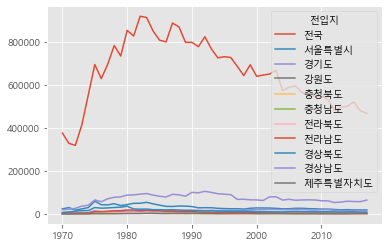

In [23]:
mask = (df['전출지별'] == '부산광역시') & (df['전입지별'] != '부산광역시')
df_busan = df[mask] # True or False 구별 True만 추출
df_busan = df_busan.drop(['전출지별'], axis=1)
df_busan.rename({'전입지별': '전입지'}, axis=1, inplace=True) # 전입지별 컬럼을 전입지로 변경
df_busan.set_index('전입지', inplace=True)  # '전입지' 컮럼을 인덱스로 설정
df_busan
df_busan.T.plot()